# IPL Data Analysis

### Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

### Reading And Exploring Dataset

In [3]:
ipl = pd.read_csv("IPL_Matches_2008_2022.csv")
ipl_dup = pd.DataFrame(data = ipl).copy()

In [4]:
ipl_dup.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [5]:
ipl_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

**We don't need the ID, Team1Players, Team2Players and method column for our analysis as they are irrelevant here.**

Therefore we drop this columns and handle all the null values as well

In [6]:
ipl_dup = ipl_dup.drop(['method', 'Team1Players', 'Team2Players', 'ID'], axis=1)

In [7]:
ipl_dup.dropna(inplace= True)

In [8]:
ipl_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 949
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             884 non-null    object 
 1   Date             884 non-null    object 
 2   Season           884 non-null    object 
 3   MatchNumber      884 non-null    object 
 4   Team1            884 non-null    object 
 5   Team2            884 non-null    object 
 6   Venue            884 non-null    object 
 7   TossWinner       884 non-null    object 
 8   TossDecision     884 non-null    object 
 9   SuperOver        884 non-null    object 
 10  WinningTeam      884 non-null    object 
 11  WonBy            884 non-null    object 
 12  Margin           884 non-null    float64
 13  Player_of_Match  884 non-null    object 
 14  Umpire1          884 non-null    object 
 15  Umpire2          884 non-null    object 
dtypes: float64(1), object(15)
memory usage: 117.4+ KB


In [9]:
ipl_dup.describe(include = "all")

,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Umpire1,Umpire2
count,884,884,884,884,884,884,884,884,884,884,884,884,884.000000,884,884,884
unique,33,662,15,80,18,18,49,18,2,1,18,2,NaN,259,58,60
top,Mumbai,05-05-2014,2022,27,Royal Challengers Bangalore,Kolkata Knight Riders,Eden Gardens,Mumbai Indians,field,N,Mumbai Indians,Wickets,NaN,AB de Villiers,AK Chaudhary,S Ravi
freq,158,2,74,15,113,115,77,114,560,884,124,485,NaN,22,83,75
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.774887,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.365826,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN


**Identifying the number of teams**

In [10]:
ipl_dup["Team1"].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

Here we see that Rising Pune Supergiant and Rising Pune Supergiants are treated as two different teams which is not correct.

So let's handle this situation

In [11]:
ipl_dup['Team1'] = ipl_dup['Team1'].str.strip()
ipl_dup['Team1'] = ipl_dup['Team1'].where(~ipl_dup['Team1'].str.startswith("Rising Pune Super"), "Rising Pune Supergiants")

ipl_dup['Team2'] = ipl_dup['Team2'].str.strip()
ipl_dup['Team2'] = ipl_dup['Team2'].where(~ipl_dup['Team2'].str.startswith("Rising Pune Super"), "Rising Pune Supergiants")

ipl_dup['WinningTeam'] = ipl_dup['WinningTeam'].str.strip()
ipl_dup['WinningTeam'] = ipl_dup['WinningTeam'].where(~ipl_dup['WinningTeam'].str.startswith("Rising Pune Super"), "Rising Pune Supergiants")

ipl_dup['TossWinner'] = ipl_dup['TossWinner'].str.strip()
ipl_dup['TossWinner'] = ipl_dup['TossWinner'].where(~ipl_dup['TossWinner'].str.startswith("Rising Pune Super"), "Rising Pune Supergiants")

In [13]:
ipl_dup["Team1"].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Pune Warriors', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

So this problem has been now solved

### Let's begin Exploring and Analysing the data

##### Team with the most wins?

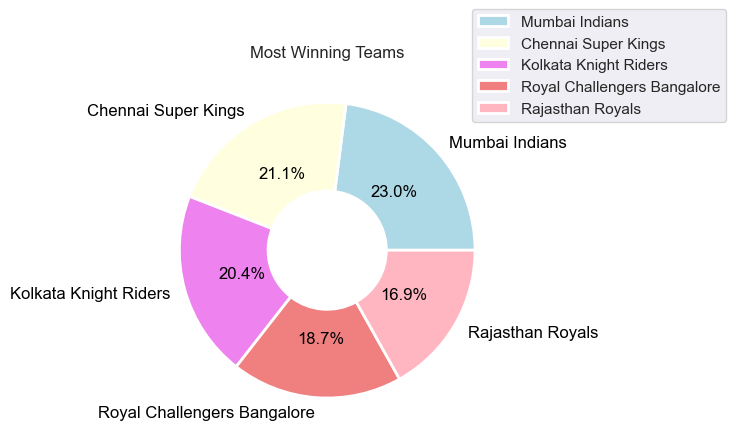

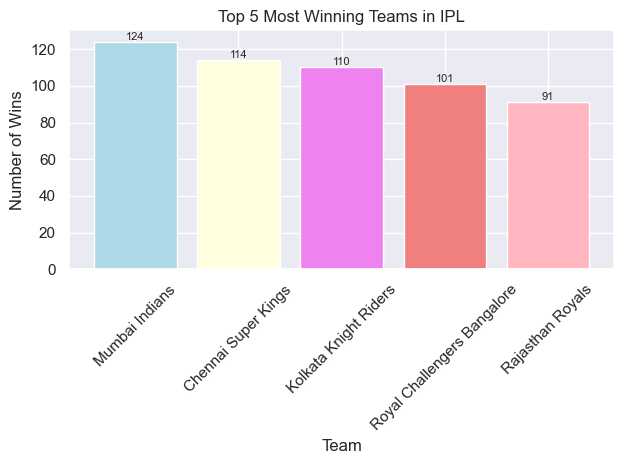

In [12]:
top_winning_teams = ipl_dup["WinningTeam"].value_counts().head()

plt.pie(top_winning_teams, labels = top_winning_teams.index, autopct= '%1.1f%%', 
        wedgeprops = dict(width = 0.6, edgecolor = 'w', linewidth = 2), colors = ['lightblue', 'lightyellow', 'violet', 'lightcoral', 'lightpink'],
       textprops=dict(color='black', fontsize=12))

plt.legend(loc = 'center right', bbox_to_anchor=(1.6, 1))
plt.title("Most Winning Teams")
plt.show()

plt.bar(top_winning_teams.index, top_winning_teams.values, color = ['lightblue', 'lightyellow', 'violet', 'lightcoral', 'lightpink'])
for index, value in enumerate(top_winning_teams):
    plt.text(index, value, str(value), va = 'bottom', ha = 'center', fontsize = 8)
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Top 5 Most Winning Teams in IPL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Top 5 Teams are as follows
    
    1. Mumbai Indians
    2. Chennai Super Kings
    3. Kolkata Knight Riders
    4. Royal Challengers Bangalore
    5. Rajasthan Royals
    
An important thing to consider here is that both Chennai and Rajasthan have played 2 less seasons as compared to others

##### Analysing the number of wins of each team in each season

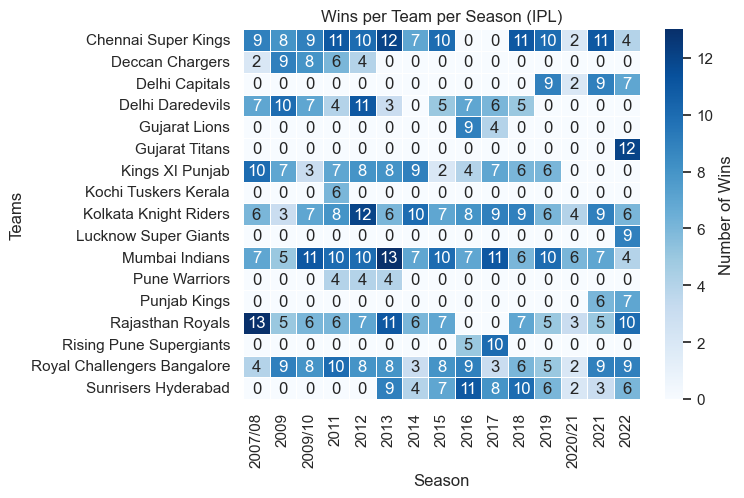

In [13]:
wins_per_season = pd.crosstab(ipl_dup['WinningTeam'], ipl_dup['Season']) #Create a table of team wins and season

sns.heatmap(data = wins_per_season, annot= True, fmt = "d", cmap="Blues",linewidths=0.5, cbar_kws={"label": "Number of Wins"})
plt.xlabel("Season")
plt.ylabel("Teams")
plt.title("Wins per Team per Season (IPL)")
plt.show()

The above heatmap is really interesting as it shows how both CSK and MI have continuously performed well in all seasons.

**Let's look at the same thing but in a stacked graph to better understand it**

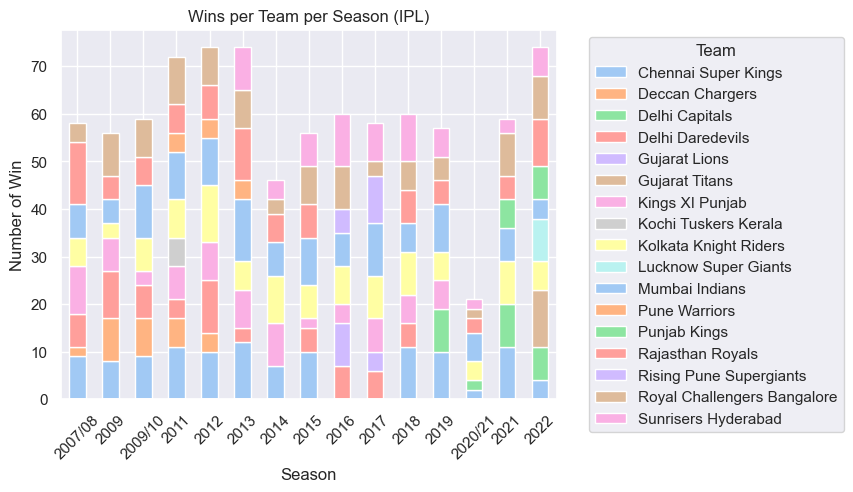

In [14]:
wins_per_season_swapped = wins_per_season.swapaxes(axis1= 0, axis2= 1)
  # Color palette for better distinction
sns.set_palette("pastel", n_colors=len(wins_per_season_swapped.columns))
wins_per_season_swapped.plot(kind = "bar", stacked = True)


plt.xlabel("Season")
plt.ylabel("Number of Win")
plt.title("Wins per Team per Season (IPL)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Team", loc='upper left', bbox_to_anchor=(1.05, 1))  # Adjust legend position
plt.show()


Another interesting trend that you can observe from the above two plots is that in most of the seasons the team with most number of wins eventually is the season winner as well.

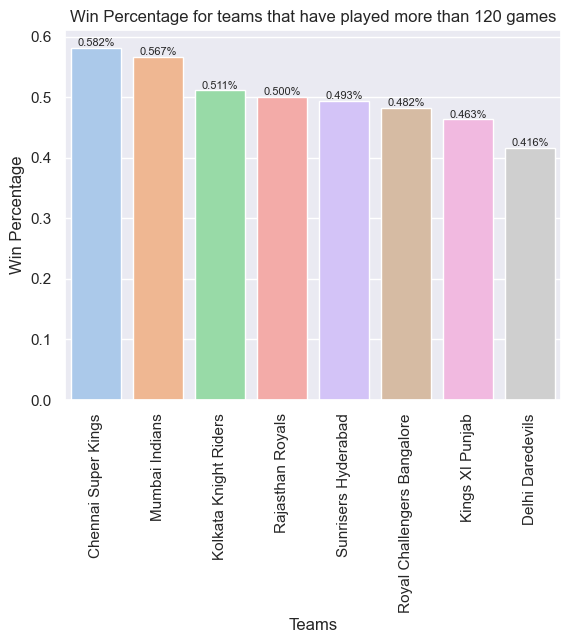

In [15]:
# Team-wise wins, total matches played, and losses
team_records = pd.DataFrame(index=pd.unique(pd.concat([ipl['Team1'], ipl['Team2']])))
team_records['Total Played'] = pd.concat([ipl['Team1'], ipl['Team2']]).value_counts().reset_index(name='Games Played').groupby('index').sum()['Games Played']
team_records['Wins'] = ipl['WinningTeam'].value_counts()
team_records['Losses'] = team_records['Total Played'] - team_records['Wins']
team_records['WinPercentage'] = team_records['Wins'] / team_records['Total Played']
team_records = team_records[team_records["Total Played"] > 120]
team_records_sorted = team_records.sort_values(by = "WinPercentage", ascending = False)


sns.barplot(data = team_records_sorted, x = team_records_sorted.index, y = "WinPercentage")

for index, value in enumerate(team_records_sorted["WinPercentage"]):
    plt.text(index, value, f"{value:.3f}%" ,ha = 'center', va = 'bottom', fontsize = 8)

plt.xlabel("Teams")
plt.ylabel("Win Percentage")
plt.xticks(rotation = 90)
plt.title("Win Percentage for teams that have played more than 120 games")
plt.show()

#### What about winnings in big matches?

**Big matches will be matches like finals, eliminator, semi final etc that are played at neutral venues**

In [16]:
ipl_dup["MatchNumber"].unique()

array(['Final', 'Qualifier 2', 'Eliminator', 'Qualifier 1', '70', '69',
       '68', '67', '66', '65', '64', '63', '62', '61', '60', '59', '58',
       '57', '56', '55', '54', '53', '52', '51', '50', '49', '48', '47',
       '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36',
       '35', '34', '33', '32', '31', '30', '29', '28', '27', '26', '25',
       '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14',
       '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2',
       '1', 'Qualifier', 'Elimination Final', '72', '71',
       '3rd Place Play-Off', 'Semi Final'], dtype=object)

<Figure size 15000x2000 with 0 Axes>

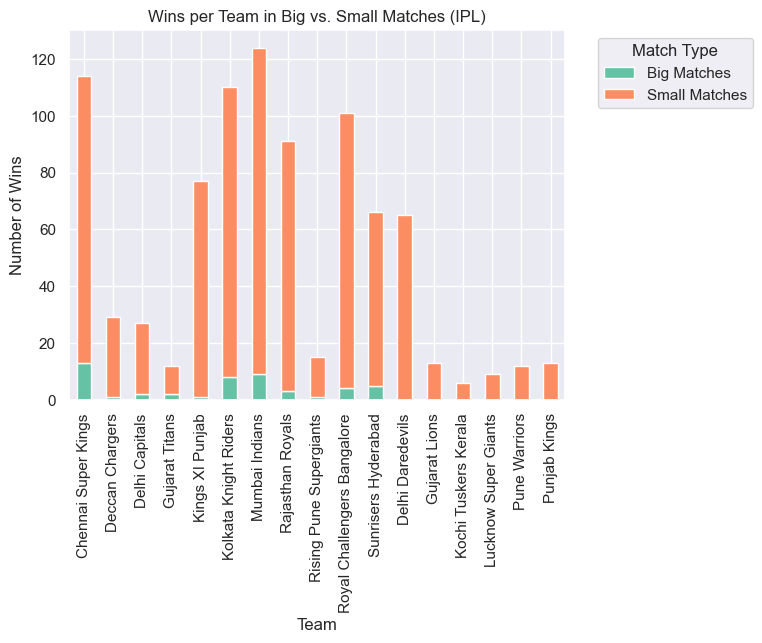

In [17]:
# define big match keywords
big_match_keywords = ["Final", "Qualifier 2", "Eliminator", "Qualifier 1", "Qualifier", "Elimination Final", "3rd Place Play-Off0", "Semi-final"]
#Create a bool series indicating a match is big or not
is_big_match = ipl_dup["MatchNumber"].isin(big_match_keywords)

big_match_wins = ipl_dup[is_big_match].groupby('WinningTeam')['WinningTeam'].count()
small_match_wins = ipl_dup[~is_big_match].groupby('WinningTeam')['WinningTeam'].count()

match_wins = pd.concat([big_match_wins, small_match_wins], axis=1).fillna(0)
match_wins.columns = ['Big Matches', 'Small Matches'] 
plt.figure(figsize=(150,20))
sns.set_palette("Set2")
match_wins.plot(kind="bar", stacked=True)

plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.title("Wins per Team in Big vs. Small Matches (IPL)")
plt.legend(title="Match Type", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

**Let's look at the percentage of wins**

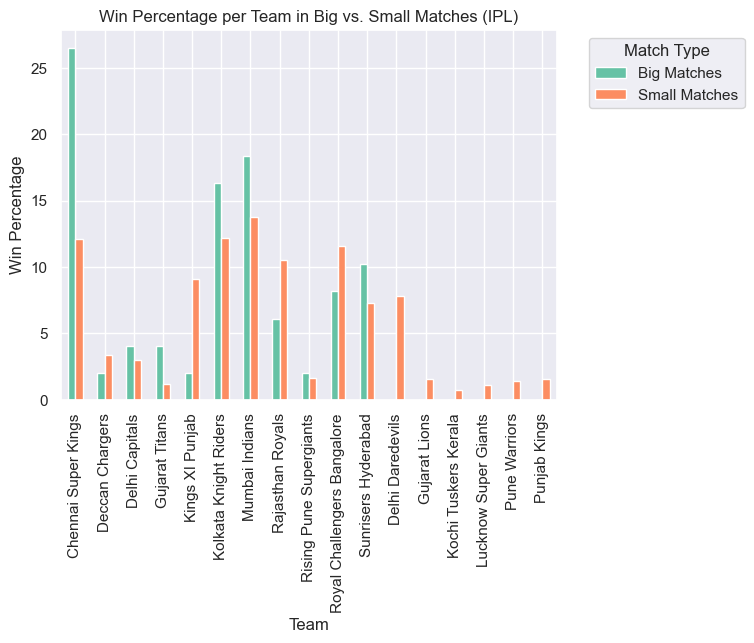

In [18]:
# Calculate win percentages for big and small matches for each team
big_match_percentages = (big_match_wins / len(ipl_dup[is_big_match])) * 100
small_match_percentages = (small_match_wins / len(ipl_dup[~is_big_match])) * 100

win_percentages = pd.concat([big_match_percentages, small_match_percentages], axis=1)
win_percentages.columns = ['Big Matches', 'Small Matches']  # Set column names

win_percentages.plot(kind='bar')
plt.xlabel("Team")
plt.ylabel("Win Percentage")
plt.title("Win Percentage per Team in Big vs. Small Matches (IPL)")
plt.legend(title="Match Type", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()


From the above plot we can see that CSK, MI, and KKR all three have a higher win percentage in big matches than in small matches. Also RCB and KXIP Tend to lose more in big matches than in small matches.

#### Winning By Runs or Winning By Wickets - Whats the trend?

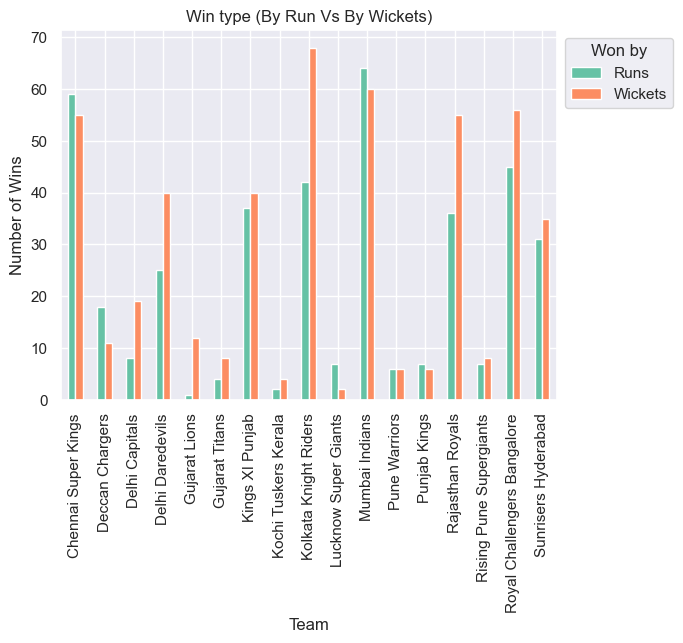

In [19]:
win_type = pd.crosstab(ipl_dup['WinningTeam'], ipl_dup['WonBy'])
win_type.plot(kind = "bar")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.title("Win type (By Run Vs By Wickets)")
plt.legend(title = "Won by", loc = "upper right" ,bbox_to_anchor= (1.25,1))
plt.show()

Above plot is also quite interesting, you can see that Chennai and Mumbai are the only two teams that are slightly better at defending their scores, while RCB and KKR are substantially better at chasing down scores.

##### Is there a relationship between winning the toss and winning the match

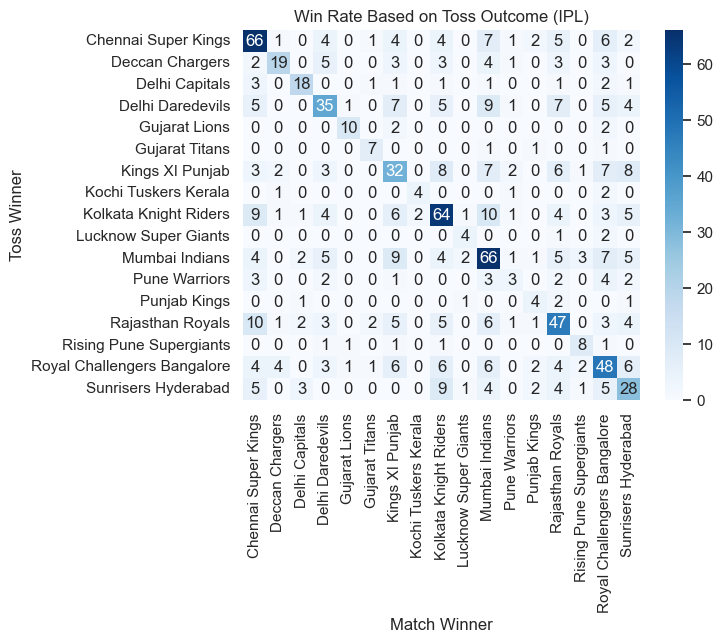

In [20]:
toss_win_matrix = pd.crosstab(ipl_dup["TossWinner"], ipl_dup["WinningTeam"])

sns.heatmap(toss_win_matrix, annot =True, cmap = "Blues")
plt.xlabel("Match Winner")
plt.ylabel("Toss Winner")
plt.title("Win Rate Based on Toss Outcome (IPL)")
plt.show()

**Which team has Won most number of Tosses**

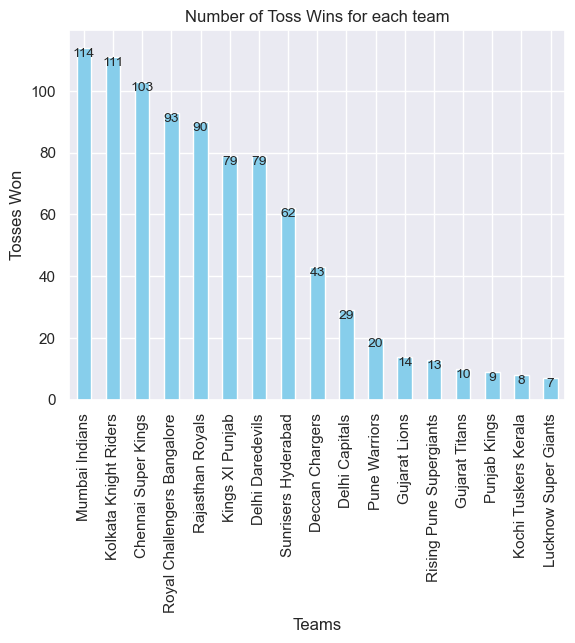

In [21]:
toss_winners = ipl_dup["TossWinner"].value_counts(ascending=False)
toss_winners.plot(kind = "bar", color = "skyblue")
for index, value in enumerate(toss_winners):
    plt.text(index, value, str(value), va = "top", ha = 'center', fontsize = 10)

plt.title("Number of Toss Wins for each team")
plt.xlabel("Teams")
plt.ylabel("Tosses Won")
plt.show()

The Three most lucky ones are as follows : 

    1.Mumbai Indians(114)
    2.Kolkata Knight Riders(111)
    3.Chennai Super Kings(103)

**What do the Teams want to do after winning the toss? To Bat Or To Ball?**

In [22]:
toss_decision = ipl["TossDecision"].value_counts()
toss_decision

field    599
bat      351
Name: TossDecision, dtype: int64

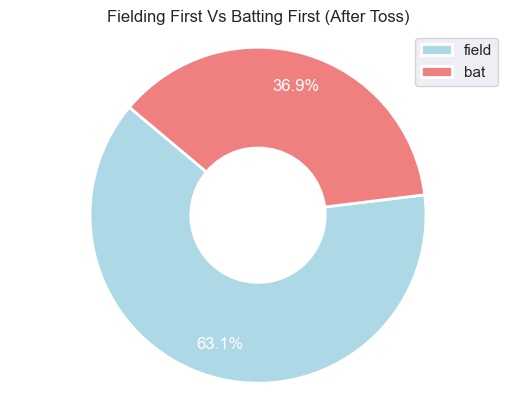

In [23]:
#plt.pie(toss_decision, labels = toss_decision.index, autopct='%.1f%%', shadow=True)
#plt.title("Fielding First Vs Batting First")
#plt.legend()
#plt.show()

data = toss_decision.values
labels = toss_decision.index

# Create the pie chart with customizations
wedgeprops = dict(width=0.6, edgecolor='w', linewidth=2)  # Adjust wedge width and border
plt.pie(data, labels=labels, autopct='%1.1f%%', pctdistance=0.8, 
        wedgeprops=wedgeprops, startangle=140, colors=['lightblue', 'lightcoral'], 
        textprops=dict(color='w', fontsize=12))

plt.axis('equal')
plt.title("Fielding First Vs Batting First (After Toss)")
plt.legend()
plt.show()

**Surprisingly Most teams prefer to Field First.**

But has this been the case always? Let's plot it for various Seasons.

In [24]:
toss_decision_seasons =  pd.crosstab(ipl_dup['Season'], ipl_dup['TossDecision'])
toss_decision_seasons

TossDecision,bat,field
Season,,
2007/08,26,32
2009,35,21
2009/10,39,20
2011,24,48
2012,37,37
2013,44,30
2014,13,33
2015,25,31
2016,11,49


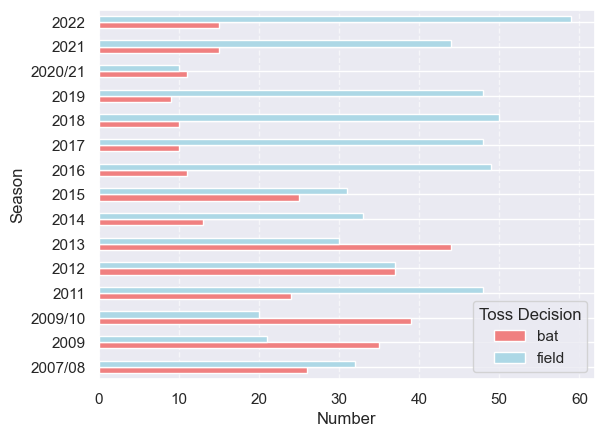

In [25]:
toss_decision_seasons.plot(kind = "barh", color = ['lightcoral', 'lightblue'])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title = "Toss Decision")
plt.xlabel("Number")
plt.ylabel("Season")
plt.show()

**Interestingly earlier in the IPL Batting first was the major choice for the teams. However in the recent trends it can be seen that most teams prefer more to bowl first than bat first.**

Now let's analyse this trend accross teams

In [26]:
toss_decision_teams =  pd.crosstab(ipl_dup['TossWinner'], ipl_dup['TossDecision'])
toss_decision_teams

TossDecision,bat,field
TossWinner,,
Chennai Super Kings,53,50
Deccan Chargers,24,19
Delhi Capitals,4,25
Delhi Daredevils,28,51
Gujarat Lions,0,14
Gujarat Titans,4,6
Kings XI Punjab,26,53
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,35,76


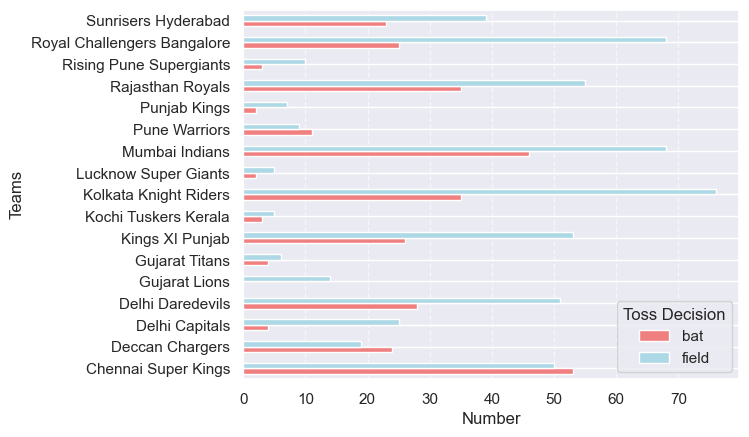

In [27]:
toss_decision_teams.plot(kind = "barh", color = ['lightcoral', 'lightblue'])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title = "Toss Decision")
plt.xlabel("Number")
plt.ylabel("Teams")
plt.show()

**All the teams tend to follow this trend of fielding first than batting**

**However there is one exception that is CSK their's is almost balanced if not they prefer batting first more.** It is also consistent with our previous findings that CSK is better at defending their scores, as they win more mactches by runs than wickets.

#### Let's See who are the most impactful players in the IPL

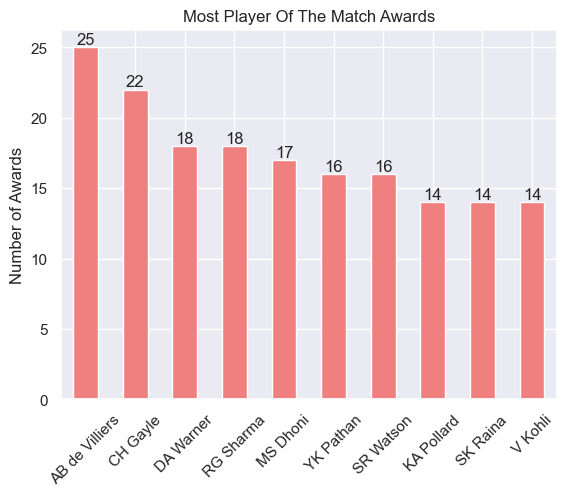

In [28]:
player_of_match = ipl["Player_of_Match"].value_counts().head(10)
player_of_match.plot(kind = "bar", title = 'Most Player Of The Match Awards', color = 'lightcoral')
for index, value in enumerate(player_of_match):
    plt.text(index, value, str(value), ha ='center', va ='bottom')
plt.ylabel('Number of Awards')
plt.xticks(rotation = 45)
plt.show()

#### Venue Analyses

In [29]:
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Wankhede Stadium, Mumbai','Wankhede Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Eden Gardens, Kolkata','Eden Gardens')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Zayed Cricket Stadium','Sheikh Zayed Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('MA Chidambaram Stadium, Chepauk, Chennai','MA Chidambaram Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Punjab Cricket Association IS Bindra Stadium','Punjab Cricket Association Stadium, Mohali')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Sheikh Zayed Stadium, Abu Dhabi','Sheikh Zayed Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Maharashtra Cricket Association Stadium','Maharashtra Cricket Association Stadium Pune')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Feroz Shah Kotla','Arun Jaitley Stadium')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Brabourne Stadium','Brabourne Stadium, Mumbai')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Punjab Cricket Association Stadium, Mohali, Mohali','Punjab Cricket Association Stadium, Mohali')
ipl_dup['Venue']=ipl_dup['Venue'].str.replace('Brabourne Stadium, Mumbai, Mumbai' , 'Brabourne Stadium, Mumbai')

C:\Users\Jalpan Patel\AppData\Local\Temp\ipykernel_22388\2213512819.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  ipl_dup['Venue']=ipl_dup['Venue'].str.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium')


In [30]:
ipl_dup['Venue'].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens',
       'Wankhede Stadium', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy',
       'Maharashtra Cricket Association Stadium Pune, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Sheikh Zayed Stadium', 'Arun Jaitley Stadium',
       'MA Chidambaram Stadium', 'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association Stadium, Mohali',
       'M Chinnaswamy Stadium', 'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium Pune',
       'Holkar Cricket Stadium', 'Green Park',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Subrata Roy Sahara Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru St

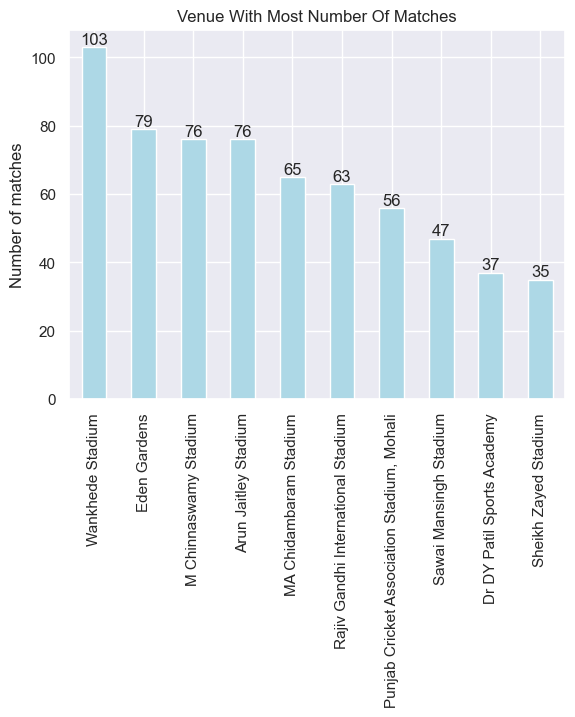

In [31]:
venues = ipl_dup["Venue"].value_counts().head(10)
venues.plot(kind = "bar", title = 'Venue With Most Number Of Matches', color = 'lightblue')
for index, value in enumerate(venues):
    plt.text(index, value, str(value), ha ='center', va ='bottom')
plt.ylabel('Number of matches')
plt.xticks(rotation = 90)
plt.show()

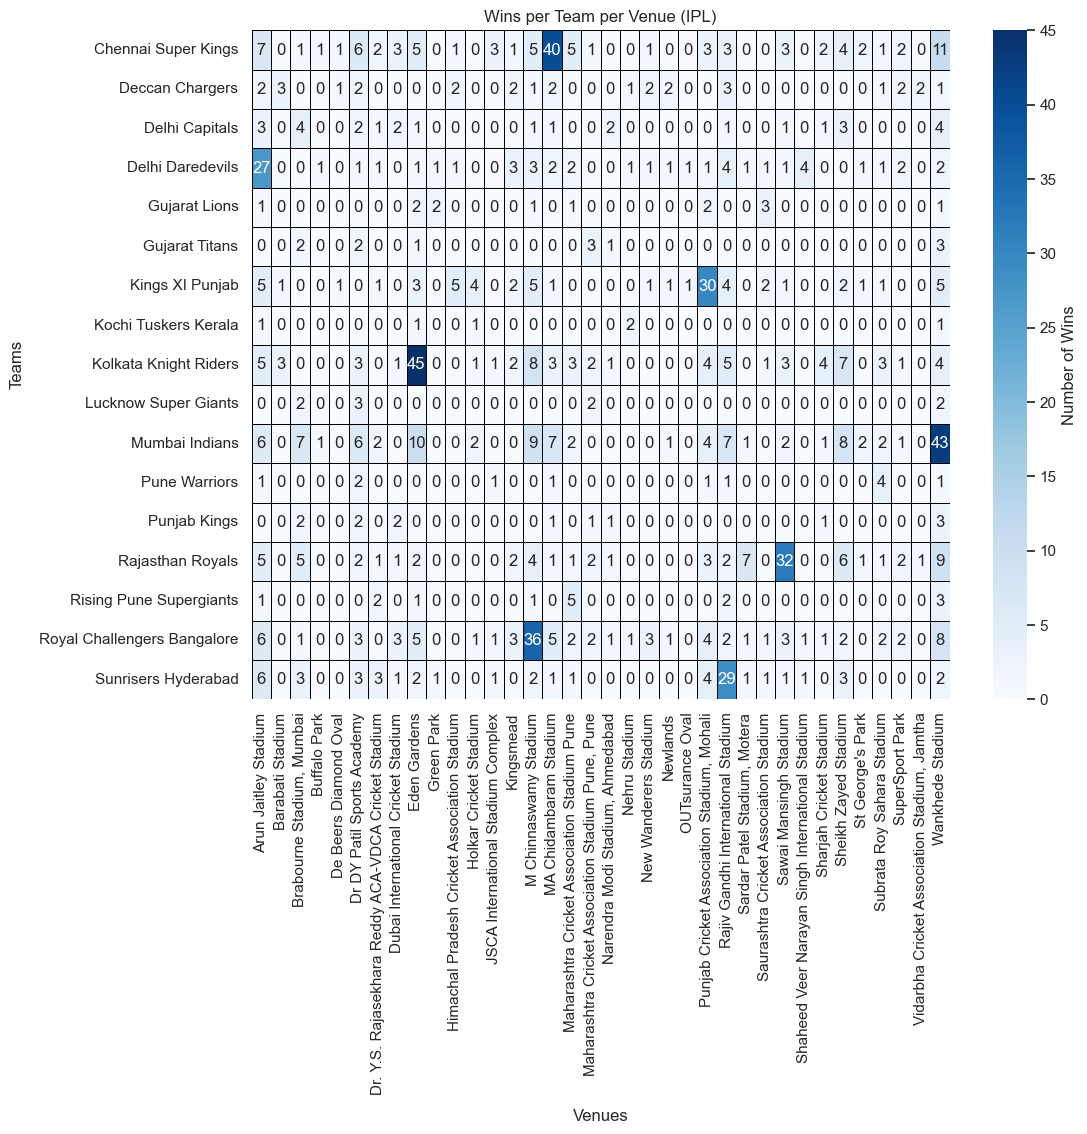

In [32]:
wins_per_venue = pd.crosstab(ipl_dup['WinningTeam'], ipl_dup['Venue']) #Create a table of team wins and season
fig, ax = plt.subplots(figsize=(11.5,11.5))
sns.heatmap(
    data = wins_per_venue, 
    annot= True, fmt = "d", 
    cmap="Blues",linewidths=0.5, 
    cbar_kws={"label": "Number of Wins"}, 
    linecolor = 'black',
    ax = ax)
ax.set_xlabel("Venues", labelpad=10)
ax.set_ylabel("Teams", labelpad=10)

# Title and display the plot
plt.title("Wins per Team per Venue (IPL)")
plt.tight_layout()
plt.show()


In [33]:
venue_pom = pd.crosstab(ipl_dup['Player_of_Match'], ipl_dup['Venue'])

In [34]:
player_venue_counts = ipl_dup.groupby(['Player_of_Match', 'Venue'])['Player_of_Match'].count().unstack(fill_value=0)

In [35]:
player_venue_counts

Venue,Arun Jaitley Stadium,Barabati Stadium,"Brabourne Stadium, Mumbai",Buffalo Park,De Beers Diamond Oval,Dr DY Patil Sports Academy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Dubai International Cricket Stadium,Eden Gardens,Green Park,...,Saurashtra Cricket Association Stadium,Sawai Mansingh Stadium,Shaheed Veer Narayan Singh International Stadium,Sharjah Cricket Stadium,Sheikh Zayed Stadium,St George's Park,Subrata Roy Sahara Stadium,SuperSport Park,"Vidarbha Cricket Association Stadium, Jamtha",Wankhede Stadium
Player_of_Match,,,,,,,,,,,,,,,,,,,,,
A Chandila,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
A Kumble,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Mishra,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A Nehra,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A Nortje,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YBK Jaiswal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
YK Pathan,0,0,1,0,0,2,0,0,5,0,...,0,1,0,0,0,1,1,1,0,0
YS Chahal,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [36]:
top_5_players = player_venue_counts.sum(axis=1).nlargest(5).index.tolist()

In [37]:
top_5_players

['AB de Villiers', 'CH Gayle', 'DA Warner', 'RG Sharma', 'MS Dhoni']

In [38]:
def get_top_4_venues(player_data):
    return player_data.nlargest(4)

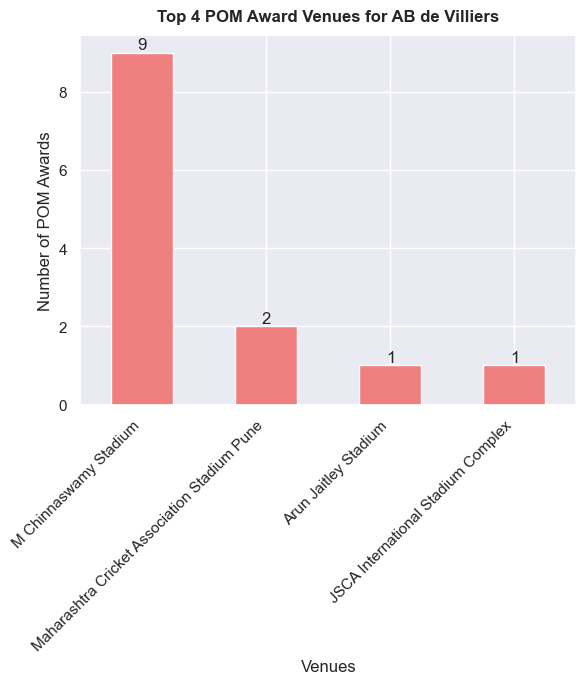

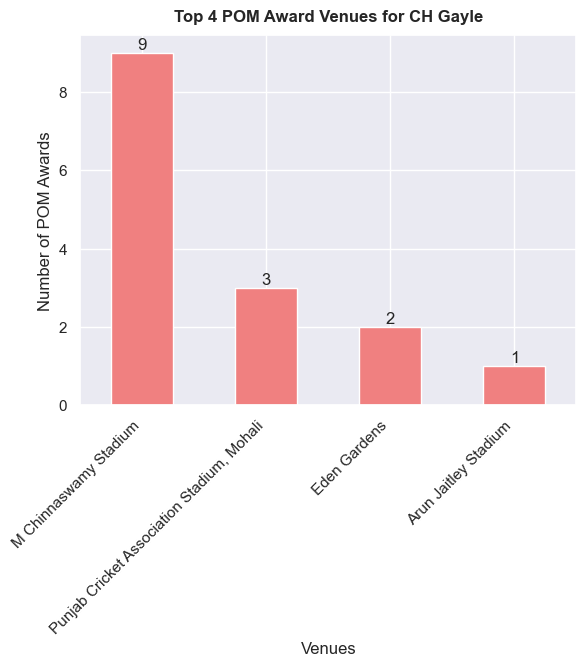

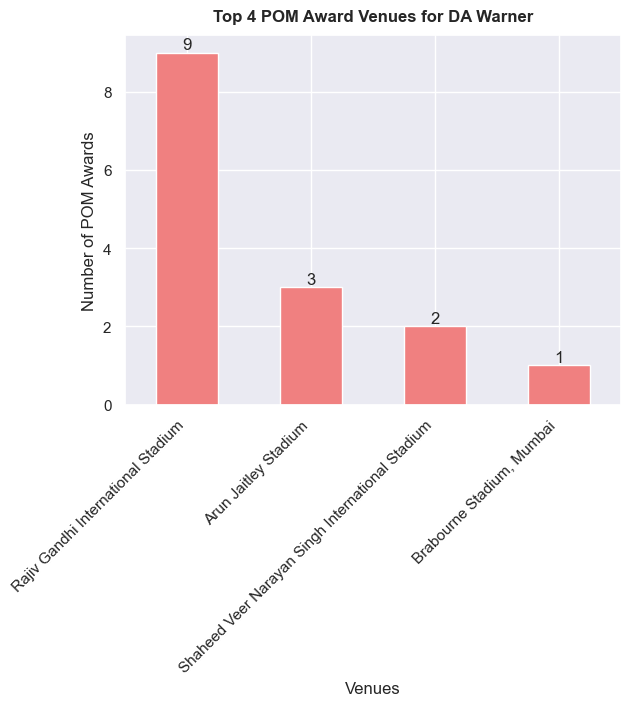

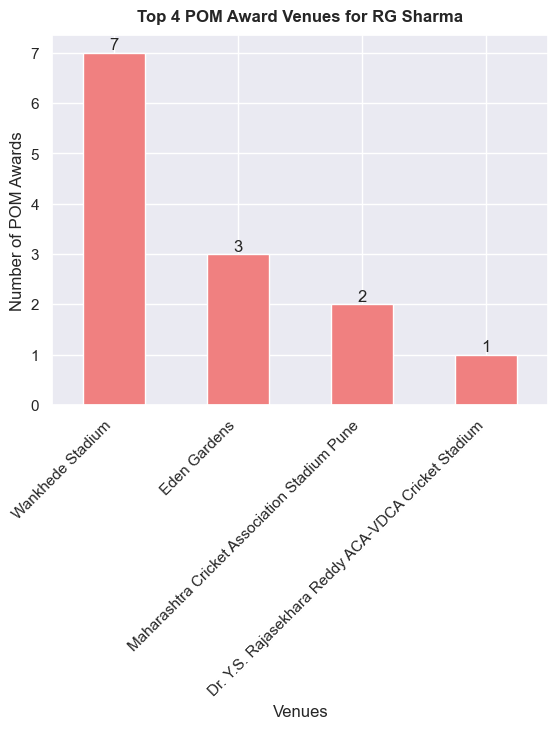

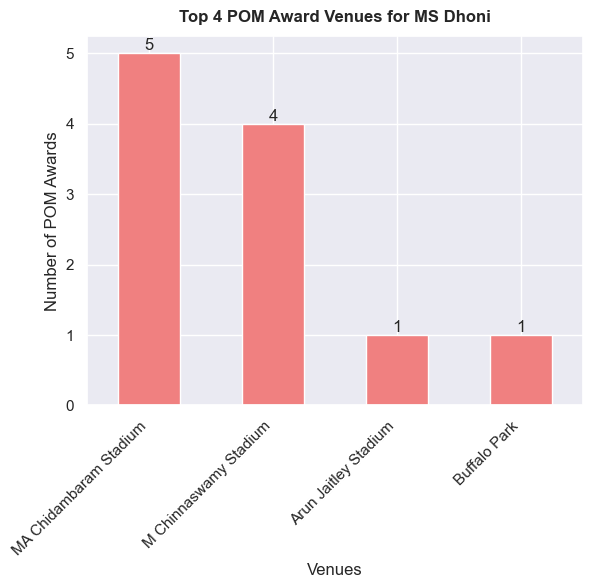

In [39]:
for player in top_5_players:
    player_data = player_venue_counts.loc[player]
    top_4_venues = get_top_4_venues(player_data.copy())  # Copy to avoid modifying original data
    plt.figure()
    top_4_venues.plot(kind='bar', color='lightcoral')
    plt.xlabel("Venues")
    plt.ylabel("Number of POM Awards")
    for index, value in enumerate(top_4_venues):
        plt.text(index, value, str(value), ha ='center', va ='bottom')
    plt.title(f"Top 4 POM Award Venues for {player}", pad = 10, fontweight = 'bold')
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    
    plt.show()

In [40]:
finals_venue = ipl_dup[ipl_dup["MatchNumber"] == "Final"]

<Axes: >

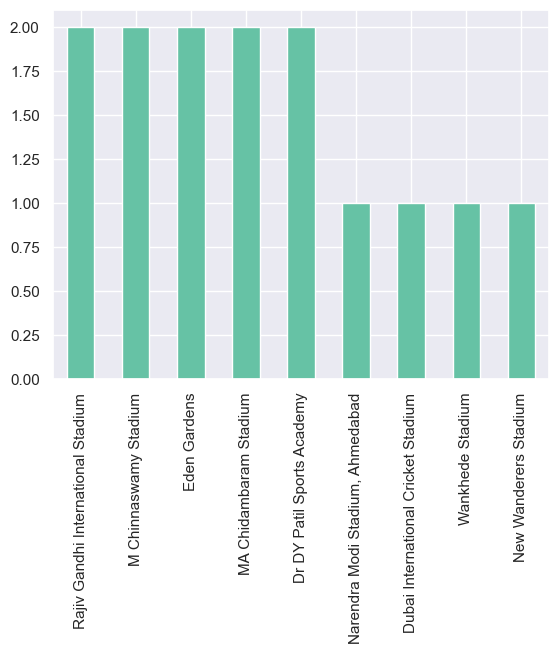

In [41]:
finals_venue["Venue"].value_counts().plot(kind = 'bar')

#### Final's analyses

#### Most Number of Titles

In [42]:
finals = ipl_dup[ipl_dup["MatchNumber"] == "Final"]

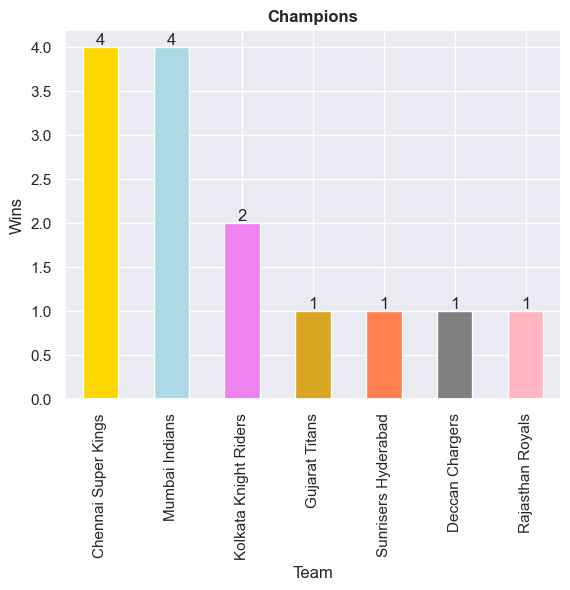

In [43]:
finals['WinningTeam'].value_counts().plot(kind = 'bar', color = ['gold', 'lightblue', 'violet', 'goldenrod', 'coral', 'gray', 'lightpink'])
for index, value in enumerate(finals['WinningTeam'].value_counts()):
    plt.text(index, value, str(value), va = 'bottom', ha ='center')
plt.title("Champions", fontweight = 'bold')
plt.ylabel("Wins")
plt.xlabel('Team')
plt.show()

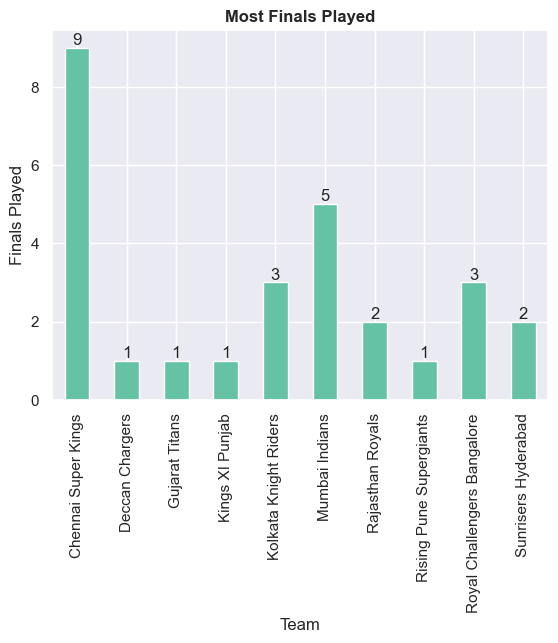

In [44]:
pd.concat([finals['Team1'],
           finals['Team2']]).value_counts().reset_index(name='Games Played').groupby('index').sum()['Games Played'].plot(kind = 'bar')
for index, value in enumerate(
    pd.concat([finals['Team1'],
               finals['Team2']]).value_counts().reset_index(name='Games Played').groupby('index').sum()['Games Played']):
    plt.text(index, value, str(value), va = 'bottom', ha = 'center')
plt.title("Most Finals Played", fontweight = 'bold')
plt.ylabel("Finals Played")
plt.xlabel("Team")
plt.show()

#### What Do Teams Prefer Doing in Finals?

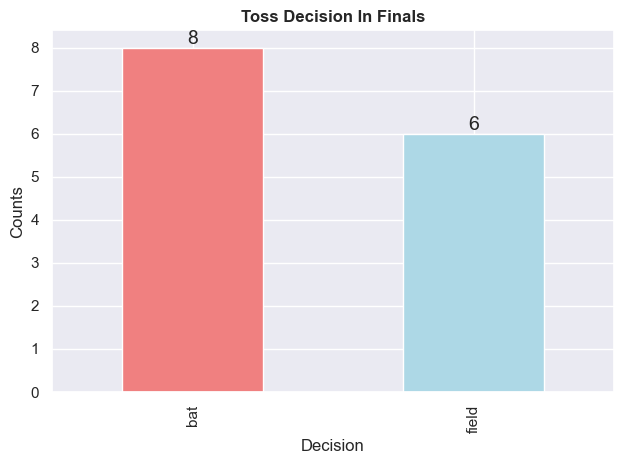

In [45]:
finals['TossDecision'].value_counts().plot(kind = 'bar', color = ['lightcoral', 'lightblue'])
for index,value in enumerate(finals['TossDecision'].value_counts()):
    plt.text(index, value, str(value), va = 'bottom', ha = 'center', fontsize = 14)
plt.title("Toss Decision In Finals", fontweight = 'bold')
plt.xlabel("Decision")
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

Interestingly the trend of choosing fielding more on winning the toss does not apply to the finals. 
**One reason that comes to mind right away is the fact that CSK and MI are the two teams that have qualified for finals the most number of times, and according to our previous analysis both this teams prefer to bat first and defend than to field first and then chase**

# Prediction of the winning team

In [123]:
ipl_dup_2 = pd.read_csv('IPL_Matches_2008_2022.csv')

In [126]:
ipl_dup_2 = ipl_dup_2.drop(['method', 'Team1Players', 'Team2Players', 'ID', 'Date', 'City', 'Season', 'MatchNumber', 
                            'SuperOver', 'WonBy', 'Margin', 'method', 'Player_of_Match',
                           'Team1Players', 'Team2Players', 'Umpire2', 'Umpire1'], axis=1)

In [127]:
ipl_dup_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team1         950 non-null    object
 1   Team2         950 non-null    object
 2   Venue         950 non-null    object
 3   TossWinner    950 non-null    object
 4   TossDecision  950 non-null    object
 5   WinningTeam   946 non-null    object
dtypes: object(6)
memory usage: 44.7+ KB


In [128]:
ipl_dup_2.dropna(inplace = True)

In [129]:
ipl_dup_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 949
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team1         946 non-null    object
 1   Team2         946 non-null    object
 2   Venue         946 non-null    object
 3   TossWinner    946 non-null    object
 4   TossDecision  946 non-null    object
 5   WinningTeam   946 non-null    object
dtypes: object(6)
memory usage: 51.7+ KB


In [133]:
ipl_dup_2['Team1']=ipl_dup_2['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
ipl_dup_2['Team2']=ipl_dup_2['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
ipl_dup_2['WinningTeam']=ipl_dup_2['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
ipl_dup_2['TossWinner']=ipl_dup_2['TossWinner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
ipl_dup_2['Team1']=ipl_dup_2['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
ipl_dup_2['Team2']=ipl_dup_2['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
ipl_dup_2['WinningTeam']=ipl_dup_2['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
ipl_dup_2['TossWinner']=ipl_dup_2['TossWinner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [134]:
ipl_dup_2['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [135]:
ipl_dup_2['Team1'] = ipl_dup_2['Team1'].str.strip()
ipl_dup_2['Team1'] = ipl_dup_2['Team1'].where(~ipl_dup_2['Team1'].str.startswith("Rising Pune Super"), "Rising Pune Supergiants")

ipl_dup_2['Team2'] = ipl_dup_2['Team2'].str.strip()
ipl_dup_2['Team2'] = ipl_dup_2['Team2'].where(~ipl_dup_2['Team2'].str.startswith("Rising Pune Super"), "Rising Pune Supergiants")

ipl_dup_2['WinningTeam'] = ipl_dup_2['WinningTeam'].str.strip()
ipl_dup_2['WinningTeam'] = ipl_dup_2['WinningTeam'].where(~ipl_dup_2['WinningTeam'].str.startswith("Rising Pune Super"), "Rising Pune Supergiants")

ipl_dup_2['TossWinner'] = ipl_dup_2['TossWinner'].str.strip()
ipl_dup_2['TossWinner'] = ipl_dup_2['TossWinner'].where(~ipl_dup_2['TossWinner'].str.startswith("Rising Pune Super"), "Rising Pune Supergiants")

In [136]:
ipl_dup_2['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [137]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
ipl_ml = pd.DataFrame(ipl_dup_2).copy()


In [139]:
ipl_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 949
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team1         946 non-null    object
 1   Team2         946 non-null    object
 2   Venue         946 non-null    object
 3   TossWinner    946 non-null    object
 4   TossDecision  946 non-null    object
 5   WinningTeam   946 non-null    object
dtypes: object(6)
memory usage: 51.7+ KB


In [140]:
def assign_batting_fielding_teams(data):
  """
  This function takes a DataFrame containing 'Team1', 'Team2', 'TossWinner', and 'TossDecision' columns
  and adds two new columns: 'BattingTeam' and 'FieldingTeam'.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.

  Returns:
      pandas.DataFrame: The DataFrame with the new columns added.
  """

  # Create empty lists to store batting and fielding teams
  batting_team = []
  fielding_team = []

  for index, row in data.iterrows():
    toss_winner = row['TossWinner']
    toss_decision = row['TossDecision']

    # Determine batting and fielding teams based on toss winner and decision
    if toss_decision == 'bat':
      batting_team.append(toss_winner)
      fielding_team.append([team for team in (row['Team1'], row['Team2']) if team != toss_winner][0])
    else:
      fielding_team.append(toss_winner)
      batting_team.append([team for team in (row['Team1'], row['Team2']) if team != toss_winner][0])

  # Add the new columns to the DataFrame
  data['BattingTeam'] = batting_team
  data['FieldingTeam'] = fielding_team

  return data

# Example usage (assuming you have your data in a DataFrame named 'data')
data_with_teams = assign_batting_fielding_teams(ipl_ml.copy())  # Avoid modifying original data

In [141]:
ipl_ml = data_with_teams[['Venue', 'TossWinner', 'TossDecision', 'WinningTeam','BattingTeam', 'FieldingTeam']]

In [142]:
ipl_ml

,Venue,TossWinner,TossDecision,WinningTeam,BattingTeam,FieldingTeam
0,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Rajasthan Royals,Gujarat Titans
1,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals
2,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Royal Challengers Bangalore,Royal Challengers Bangalore,Lucknow Super Giants
3,"Eden Gardens, Kolkata",Gujarat Titans,field,Gujarat Titans,Rajasthan Royals,Gujarat Titans
4,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Punjab Kings,Sunrisers Hyderabad,Punjab Kings
...,...,...,...,...,...,...
945,Eden Gardens,Sunrisers Hyderabad,bat,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders
946,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
947,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Capitals,Rajasthan Royals,Delhi Capitals
948,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,Chennai Super Kings,Kings XI Punjab


In [143]:
team_records = pd.DataFrame(index=pd.unique(pd.concat([ipl_ml['BattingTeam'], ipl_ml['FieldingTeam']])))
team_records['Total Played'] = pd.concat([ipl_ml['BattingTeam'], ipl_ml['FieldingTeam']]).value_counts().reset_index(name='Games Played').groupby('index').sum()['Games Played']
team_records['Wins'] = ipl_ml['WinningTeam'].value_counts()
team_records['WinPercentage'] = team_records['Wins'] / team_records['Total Played']
ipl_ml['BattingTeamWinRatio'] = ipl_ml['BattingTeam'].map(team_records['WinPercentage'])
ipl_ml['FieldingTeamWinRatio'] = ipl_ml['FieldingTeam'].map(team_records['WinPercentage'])


C:\Users\Jalpan Patel\AppData\Local\Temp\ipykernel_22388\1472769128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_ml['BattingTeamWinRatio'] = ipl_ml['BattingTeam'].map(team_records['WinPercentage'])


In [144]:
venue_win_count = ipl_ml.groupby(['Venue', 'WinningTeam']).size()
venue_total_matches = ipl_ml.groupby('Venue').size()
venue_win_ratio = venue_win_count / venue_total_matches
ipl_ml['VenueWinRatio_BatTeam'] = ipl_ml.apply(lambda x: venue_win_ratio.get((x['Venue'], x['BattingTeam']), 0), axis=1)
ipl_ml['VenueWinRatio_FieldTeam'] = ipl_ml.apply(lambda x: venue_win_ratio.get((x['Venue'], x['FieldingTeam']), 0), axis=1)

In [147]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['BattingTeam', 'FieldingTeam', 'Venue', 'TossDecision', 'TossWinner']
for col in categorical_columns:
    ipl_ml[col] = label_encoder.fit_transform(ipl_ml[col])

# Encode the target variable
ipl_ml['WinningTeam'] = label_encoder.fit_transform(ipl_ml['WinningTeam'])

Venue                      0.096180
TossWinner                 0.470552
TossDecision               0.033722
BattingTeam                0.375961
FieldingTeam               0.482866
BattingTeamWinRatio       -0.135087
FieldingTeamWinRatio      -0.131833
VenueWinRatio_BatTeam     -0.080433
VenueWinRatio_FieldTeam    0.054504
dtype: float64


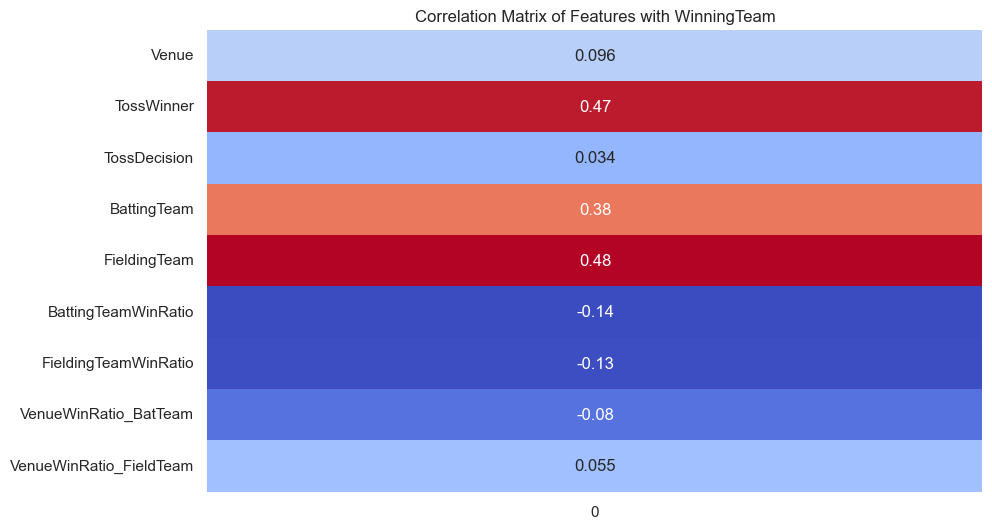

In [148]:
X = ipl_ml.drop(columns=['WinningTeam'], axis = 1)
y = ipl_ml['WinningTeam']

# Calculate correlation matrix
correlation_matrix = X.corrwith(y)
print(correlation_matrix)
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Matrix of Features with WinningTeam')
plt.show()

In [149]:
from sklearn.model_selection import train_test_split

# Split the dataset using stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [150]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [4, 8, 12],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
grid_search = GridSearchCV(rfc_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [151]:
rfc_best = grid_search.best_estimator_

In [152]:
grid_search.best_score_

0.5833652840711049

In [59]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [153]:
rfc_pred = rfc_best.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)

In [154]:
rfc_accuracy

0.5578947368421052

In [155]:
base_estimator = RandomForestClassifier(max_depth=12, min_samples_split=10)

bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print("Bagging Accuracy:", bagging_accuracy)

Bagging Accuracy: 0.6


In [156]:
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.5473684210526316


In [157]:
gradientboost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradientboost_model.fit(X_train, y_train)

gradientboost_pred = gradientboost_model.predict(X_test)
gradientboost_accuracy = accuracy_score(y_test, gradientboost_pred)
print("Gradient Boosting Accuracy:", gradientboost_accuracy)


Gradient Boosting Accuracy: 0.5210526315789473


In [158]:
from xgboost import XGBClassifier

model = XGBClassifier(objective='binary:logistic', n_estimators = 500, max_depth=8, learning_rate=0.1, gamma=0)

In [159]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [160]:
xg_pred = model.predict(X_test)
Xgboost_accuracy = accuracy_score(y_test, xg_pred)
Xgboost_accuracy

0.5368421052631579

In [66]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [67]:
grid_search.best_score_

0.5954250324642893

In [68]:
best_model = grid_search.best_estimator_

In [69]:
gb_pred = best_model.predict(X_test)
gradientboost_accuracy = accuracy_score(y_test, gb_pred)

In [70]:
gradientboost_accuracy

0.6101694915254238

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred, average="micro")
recall = recall_score(y_test, gb_pred, average = "micro")
f1 = f1_score(y_test, gb_pred, average = "micro")
#auc = roc_auc_score(y_test, gb_pred, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
#print("AUC-ROC:", auc)

Accuracy: 0.6101694915254238
Precision: 0.6101694915254238
Recall: 0.6101694915254238
F1-score: 0.6101694915254238


In [72]:
gradientboost_accuracy

0.6101694915254238

In [78]:
param_grid = {'n_neighbors': [3, 5, 7], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree']}

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 7]},
             scoring='accuracy')

In [80]:
grid_search.best_score_

0.31694136449905097

In [161]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('gbc', gb_classifier), ('abc', adaboost_model), ('bagging', bagging_model), ('XGboost', model)], voting='hard')

In [162]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(random_state=42)),
                             ('abc',
                              AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=12,
                                                                                  min_samples_split=10),
                                                 random_state=42)),
                             ('bagging',
                              BaggingClassifier(estimator=RandomForestClassifier(max_depth=12,
                                                                                 min_samples_split=10),
                                                random_state=42)),
                             ('XGboost',
                              XGBClassifier(base_score=None, b...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))])

In [163]:
y_pred = voting_clf.predict(X_test)

In [164]:
voting_acc = accuracy_score(y_test, y_pred)

In [165]:
voting_acc

0.5684210526315789

In [119]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')

In [120]:
cv_scores

array([0.61971831, 0.53521127, 0.4964539 , 0.61702128, 0.56028369])